# Pytorch Basic

Pytorch is a python library for deep learning. It provides a high level abstraction which make it easy to train deep neural networks.

Let's install pytorch first.

In [1]:
!pip install torch

For this tutorial, we will use the following version:

In [2]:
# Check pytorch version
import torch
print(torch.__version__)

2.1.2+cu121


## Tensor

Tensor is the basic data structure in pytorch. It is similar to numpy array, but it provides automatic differentiation and it can be run on GPU.

If we look at the trend, it's current [the most popular deep learning library](https://paperswithcode.com/trends)

The capability of running on GPU is very important for deep learning. It can speed up the training process by a lot by parallelizing the computation. Watch this demo: [GPU vs CPU Demonstration](https://www.youtube.com/watch?v=-P28LKWTzrI)

Tensor is n-dimensional array. When n is 0, it is a scalar. When n is 1, it is a vector. When n is 2, it is a matrix. When n is 3, it is a cube. When n is 4, it is a 4-dimensional array. And so on.

In [3]:
# 0 dimension tensor
import torch

x = torch.tensor(42)
print(x)

tensor(42)


In [4]:
# 1 dimension tensor
import torch

x = torch.tensor([42, 43])
print(x)

tensor([42, 43])


In [5]:
# 2 dimension tensor
import torch

x = torch.tensor([[42, 43], [44, 45]])
print(x)

tensor([[42, 43],
        [44, 45]])


In [6]:
# 3 dimension tensor
import torch

x = torch.tensor([[[42, 43], [44, 45]], [[46, 47], [48, 49]]])
print(x)

tensor([[[42, 43],
         [44, 45]],

        [[46, 47],
         [48, 49]]])


To check the dimension of a tensor, we can use the `dim()` method.

In [7]:
x = torch.tensor([[[42, 43], [44, 45]], [[46, 47], [48, 49]]])
print(x.dim())

x = torch.tensor(42)
print(x.dim())

3
0


## Constructing Tensor

### Random Tensor

In [8]:
import torch
torch.rand(5, 3)

tensor([[0.3578, 0.0278, 0.2041],
        [0.1766, 0.3871, 0.1607],
        [0.5307, 0.4715, 0.8806],
        [0.3519, 0.8731, 0.5240],
        [0.5874, 0.4203, 0.3554]])

The parameters of the `rand()` method are the dimension of the tensor. For example, `torch.rand(2, 3)` will create a 2x3 tensor with random values.

In [9]:
import torch
# One dimensional tensor containing 5 random numbers
torch.rand(5)

tensor([0.2976, 0.0255, 0.4862, 0.0042, 0.9213])

### Ones Tensor

Ones tensor is a tensor with all values equal to 1

In [10]:
import torch
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Quiz: what's the output of `torch.ones(1, 2)`?

In [11]:
import torch
torch.zeros(1, 2)

tensor([[0., 0.]])

### Zeros Tensor

Zeros tensor is a tensor with all values equal to 0

In [12]:
import torch
torch.zeros(1,2,3)

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])

### Range Tensor

If we want to create a tensor with values from 0 to n-1, we can use the `torch.arange(n)` method.

In [13]:
import torch
torch.arange(1, 10)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
torch.arange(-3, 3, 2)

tensor([-3, -1,  1])

### Full

If we want to create a tensor with all values equal to a constant, we can use the `torch.full()` method.

In [15]:
import torch
torch.full((2, ), 42)

tensor([42, 42])

In [16]:
import torch
torch.full((2, 3), 42)

tensor([[42, 42, 42],
        [42, 42, 42]])

## Tensor Operations

We can do normal arithmetic operations on tensor:

In [17]:
x = torch.tensor(42)
print(x + 2)
print(x * 3)
print(x ** 2)
print(x / 2)

tensor(44)
tensor(126)
tensor(1764)
tensor(21.)


We can do similar operations on higher dimensional tensors:

In [18]:
x = torch.tensor([1, 2])
print(x + 1)

x = torch.tensor([[1, 2], [3, 4]])
print(x + 1)

tensor([2, 3])
tensor([[2, 3],
        [4, 5]])


Wow from mathematic lesson, didn't we learn that addition operations are only defined for tensors with the same shape? How come we can add a scalar tensor (0 dim) with a 2 dim tensor?

This is because of broadcasting. Pytorch will automatically broadcast the scalar tensor to match the shape of the other tensor.

So,

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\end{bmatrix}
+ 1
$$

would become

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\end{bmatrix}
+
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

## Broadcasting

So how does broadcasting work?

Taken from [Pytorch Docs](https://pytorch.org/docs/stable/notes/broadcasting.html):

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

Broadcasting rules:

- If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
- Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [19]:
import torch
torch.full((1,), 5) + torch.ones(3)


tensor([6., 6., 6.])

$$
\begin{bmatrix}
5
\end{bmatrix}
+
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
5 \\
5 \\
5
\end{bmatrix}
+
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$

In [20]:
import torch
# Error
torch.ones(3) + torch.ones(5)

RuntimeError: The size of tensor a (3) must match the size of tensor b (5) at non-singleton dimension 0

$$
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
+
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
1
\end{bmatrix}
=
error
$$

Why is it an error?

Remember this rule:

> When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

The trailing dimension of the first tensor is 3, while the trailing dimension of the second tensor is 5. They are not equal, one of them is not 1, and one of them does not exist. So it's an error.

Let's try again

In [35]:
import torch

torch.full((2, 2), 5) + torch.full((1, 2), 3)

tensor([[8, 8],
        [8, 8]])

$$
\begin{bmatrix}
5 && 5 \\
5 && 5 \\
\end{bmatrix}
+
\begin{bmatrix}
3 && 3
\end{bmatrix}
=
\begin{bmatrix}
5 && 5 \\
5 && 5 \\
\end{bmatrix}
+
\begin{bmatrix}
3 && 3 \\
3 && 3 \\
\end{bmatrix}
$$

In [22]:
import torch

x = torch.full((3, 4, 2), 5)
y = torch.full((2,), 3)
z = x + y
print('x =', x)
print('y =', y)
print('z = ',z)

x = tensor([[[5, 5],
         [5, 5],
         [5, 5],
         [5, 5]],

        [[5, 5],
         [5, 5],
         [5, 5],
         [5, 5]],

        [[5, 5],
         [5, 5],
         [5, 5],
         [5, 5]]])
y = tensor([3, 3])
z =  tensor([[[8, 8],
         [8, 8],
         [8, 8],
         [8, 8]],

        [[8, 8],
         [8, 8],
         [8, 8],
         [8, 8]],

        [[8, 8],
         [8, 8],
         [8, 8],
         [8, 8]]])


## Matrix Operation

Tensor can be multiplied with another tensor using the `matmul()` method or the `@` operator.

In [23]:
import torch

x = torch.tensor([[3, 4]])
print(x.shape)
y = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(y.shape)
x @ y


torch.Size([1, 2])
torch.Size([2, 3])


tensor([[19, 26, 33]])

$$
\begin{bmatrix}
3 && 4
\end{bmatrix}
\times
\begin{bmatrix}
1 && 2 && 3 \\
4 && 5 && 6
\end{bmatrix}
$$

Be careful not to be confused with the `*` operator. The `*` operator is element-wise multiplication.

In [24]:
import torch

x = torch.tensor([[3, 4]])
x * x


tensor([[ 9, 16]])

## Transpose

We can transpose a tensor using the `t` method.

In [25]:
import torch

x = torch.tensor([[3, 4]])
print(x)
print(x.shape)
print(x.T)
print(x.T.shape)


tensor([[3, 4]])
torch.Size([1, 2])
tensor([[3],
        [4]])
torch.Size([2, 1])


## Neural Network with Pytorch

Now we have learned the required knowledge to build a neural network with pytorch.


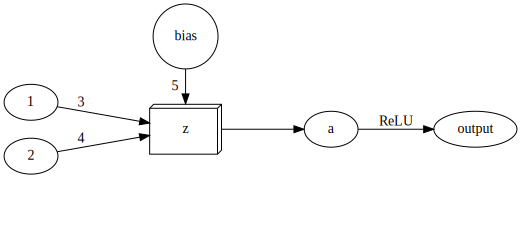

In [26]:
from fastbook import *


# Draw neurons with multiple inputs and weights
gv('''
z[shape=box3d width=1 height=0.7]
bias[shape=circle width=0.3]
x_0[label=1]
x_1[label=2]
// Subgraph to force alignment on x-axis
subgraph {
    rank=same;
    z;
    bias;
    alignmentNode [style=invis, width=0]; // invisible node for alignment
    bias -> alignmentNode [style=invis]; // invisible edge
    z -> alignmentNode [style=invis]; // invisible edge
}
x_0->z [label="3"]
x_1->z [label="4"]
bias->z [label="5" pos="0,1.2!"]
z->a
a->output [label="ReLU"]
''')



Remember the equation

$$
z = wx + b\\
a = ReLU(z)
$$

Let's represent it in pytorch

In [27]:
x = torch.tensor([[1],[2]])

w = torch.tensor([3, 4])
b = torch.tensor(5)
z = w @ x + b
a = z.relu()
a

tensor([16])

How about multiple layers? Easy!

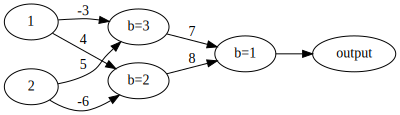

In [28]:
from fastbook import *

gv('''
   x_0[label=1]
   x_1[label=2]
   a_0_0[label="b=3"]
   a_0_1[label="b=2"]
   a_1_0[label="b=1"]
   x_0 -> a_0_0 [label=-3]
   x_0 -> a_0_1 [label=4]
   x_1 -> a_0_0 [label=5]
   x_1 -> a_0_1 [label=-6]
   a_0_0 -> a_1_0 [label=7]
   a_0_1 -> a_1_0 [label=8]
   a_1_0 -> output
   ''')

In [29]:
x = torch.tensor([[1],[2]])

w_0 = torch.tensor([[-3, 5], [4, -6]])
b_0 = torch.tensor([[3], [2]])
a_0 = torch.relu(w_0 @ x + b_0)

w_1 = torch.tensor([[7, 8]])
b_1 = torch.tensor([[1]])
a_1 = torch.relu(w_1 @ a_0 + b_1)
a_1

tensor([[71]])

## Exercise

In [30]:
!pip install rggrader

In [34]:
# @title #### Student Identity
student_id = "REA3X5EN" # @param {type:"string"}
name = "Steven Adi Santoso" # @param {type:"string"}

Implement the following neural network

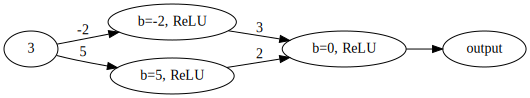

In [32]:
from fastbook import *

gv('''
   x_0[label=3]
   a_0_0[label="b=-2, ReLU"]
   a_0_1[label="b=5, ReLU"]
   a_1_0[label="b=0, ReLU"]
   x_0 -> a_0_0 [label=-2]
   x_0 -> a_0_1 [label=5]
   a_0_0 -> a_1_0 [label=3]
   a_0_1 -> a_1_0 [label=2]

   a_1_0 -> output
   ''')

In [39]:
from rggrader import submit

# Put your code here
x = torch.tensor([[3]])

w_0 = torch.tensor([[-2], [5]])
b_0 = torch.tensor([[-2], [5]])
a_0 = torch.relu(w_0 @ x + b_0)

w_1 = torch.tensor([[3, 2]])
b_1 = torch.tensor([[0]])
a_1 = torch.relu(w_1 @ a_0 + b_1)

answer = a_1

print(a_1)

assignment_id = "10_pytorch-basic"
question_id = "00_single-input-nn"
submit(student_id, name, assignment_id, str(answer), question_id)


tensor([[40]])


'Assignment successfully submitted'

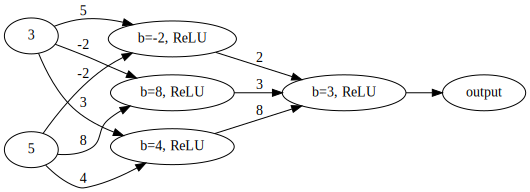

In [40]:
from fastbook import *

gv('''
   x_0[label=3]
   x_1[label=5]
   a_0_0[label="b=8, ReLU"]
   a_0_1[label="b=-2, ReLU"]
   a_0_2[label="b=4, ReLU"]
   a_1_0[label="b=3, ReLU"]
   x_0 -> a_0_0 [label=-2]
   x_0 -> a_0_1 [label=5]
   x_0 -> a_0_2 [label=3]
   x_1 -> a_0_0 [label=8]
   x_1 -> a_0_1 [label=-2]
   x_1 -> a_0_2 [label=4]
   a_0_0 -> a_1_0 [label=3]
   a_0_1 -> a_1_0 [label=2]
   a_0_2 -> a_1_0 [label=8]

   a_1_0 -> output
   ''')

In [42]:
from rggrader import submit

# Put your code here
x = torch.tensor([[3], [5]])

w_0 = torch.tensor([[5, -2], [-2, 8], [3, 4]])
b_0 = torch.tensor([[-2], [8], [4]])
a_0 = torch.relu(w_0 @ x + b_0)

w_1 = torch.tensor([[2, 3, 8]])
b_1 = torch.tensor([[3]])
a_1 = torch.relu(w_1 @ a_0 + b_1)

answer = a_1

print(a_1)

assignment_id = "10_pytorch-basic"
question_id = "01_multi-input-nn"
submit(student_id, name, assignment_id, str(answer), question_id)


tensor([[399]])


'Assignment successfully submitted'